<a href="https://colab.research.google.com/github/shreyamanapure/cutomer_inquiri_support_management/blob/main/Ticket_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the Data**

In [ ]:
!kaggle datasets download -d tobiasbueck/multilingual-customer-support-tickets

Dataset URL: https://www.kaggle.com/datasets/tobiasbueck/multilingual-customer-support-tickets
License(s): Attribution 4.0 International (CC BY 4.0)
multilingual-customer-support-tickets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extract data from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/content/multilingual-customer-support-tickets.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# read data

import pandas as pd
data=pd.read_csv('/content/helpdesk_customer_tickets.csv')
data.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,36,Anfrage zu den Spezifikationen und Anpassungso...,Sehr geehrtes Support-Team des Tech Online Sto...,"Sehr geehrter <name>,\n\nvielen Dank für Ihr I...",Request,Customer Service,medium,de,Tech Online Store,Product Support,Sales Inquiry,Technical Guidance,General Inquiry,NaN,NaN,NaN,NaN,NaN
1,39,Déconnexions fréquentes et plantages,Le client signale des déconnexions fréquentes ...,Nous allons enquêter sur le problème avec Zoom...,Incident,Product Support,high,fr,Software Development Company,Technical Support,Software Bug,Service Disruption,System Crash,Problem Resolution,Performance Tuning,NaN,NaN,NaN
2,243,Problema de sonido Dell XPS,"Problema con el sonido, manejando como devoluc...",Gracias por su correo electrónico. Procesaremo...,Problem,Returns and Exchanges,medium,es,Tech Online Store,Returns and Exchanges,Product Support,Customer Service,Refund Request,NaN,NaN,NaN,NaN,NaN
3,381,Assistance requise pour la configuration du ta...,"Cher support client,\n\nNotre client, <name>, ...","Cher <name>,\n\nMerci de nous avoir contactés....",Request,Product Support,medium,fr,Software Development Company,Technical Support,Product Support,General Inquiry,Problem Resolution,Training Request,NaN,NaN,NaN,NaN
4,663,Urgente: Assistência Imediata Necessária para ...,Caro Suporte ao Cliente da Firma de Consultori...,"Caro Cliente,\n\nRecebemos sua solicitação urg...",Incident,Human Resources,medium,pt,IT Consulting Firm,Urgent Issue,Payroll Issue,Technical Support,Service Disruption,Problem Resolution,Account Assistance,NaN,NaN,NaN


**Exploratory Data Analysis**

In [ ]:
# importing necessary libraries

import matplotlib.pyplot as plt

In [ ]:
data.info() # metadata about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             600 non-null    int64  
 1   subject        599 non-null    object 
 2   body           600 non-null    object 
 3   answer         600 non-null    object 
 4   type           600 non-null    object 
 5   queue          600 non-null    object 
 6   priority       600 non-null    object 
 7   language       600 non-null    object 
 8   business_type  600 non-null    object 
 9   tag_1          600 non-null    object 
 10  tag_2          600 non-null    object 
 11  tag_3          600 non-null    object 
 12  tag_4          600 non-null    object 
 13  tag_5          432 non-null    object 
 14  tag_6          173 non-null    object 
 15  tag_7          56 non-null     object 
 16  tag_8          9 non-null      object 
 17  tag_9          0 non-null      float64
dtypes: float64

In [ ]:
data.count() # number of records per column

,0
id,600
subject,599
body,600
answer,600
type,600
queue,600
priority,600
language,600
business_type,600
tag_1,600


In [ ]:
print(data.isnull().sum()) # number of null values in each column

id                 0
subject            1
body               0
answer             0
type               0
queue              0
priority           0
language           0
business_type      0
tag_1              0
tag_2              0
tag_3              0
tag_4              0
tag_5            168
tag_6            427
tag_7            544
tag_8            591
tag_9            600
dtype: int64


In [ ]:
data['queue'].unique() # unique values in column queue

array(['Customer Service', 'Product Support', 'Returns and Exchanges',
       'Human Resources', 'Billing and Payments', 'Technical Support',
       'IT Support', 'Sales and Pre-Sales', 'General Inquiry',
       'Service Outages and Maintenance'], dtype=object)

In [ ]:
data['business_type'].unique() # unique values in column business_type

array(['Tech Online Store', 'Software Development Company',
       'IT Consulting Firm', 'IT Services'], dtype=object)

In [ ]:
data['type'].unique() # unique values in column type

array(['Request', 'Incident', 'Problem', 'Change'], dtype=object)

In [ ]:
data['priority'].unique() # unique values in column priority

array(['medium', 'high', 'low'], dtype=object)

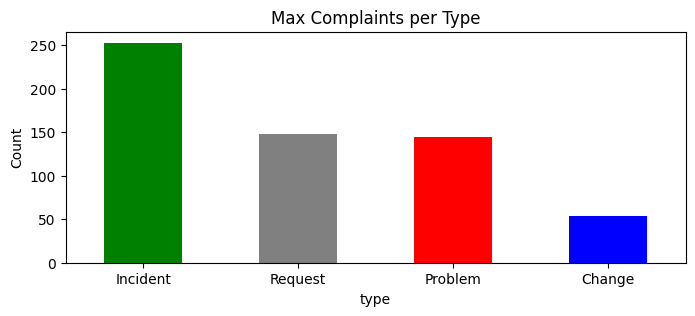

In [ ]:
#visualize number of complaints for each type

channel_counts = data['type'].value_counts()
plt.figure(figsize=(8, 3))
channel_counts.plot(kind='bar', color=['green', 'grey', 'red','blue'])
plt.title('Max Complaints per Type')
plt.xlabel('type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

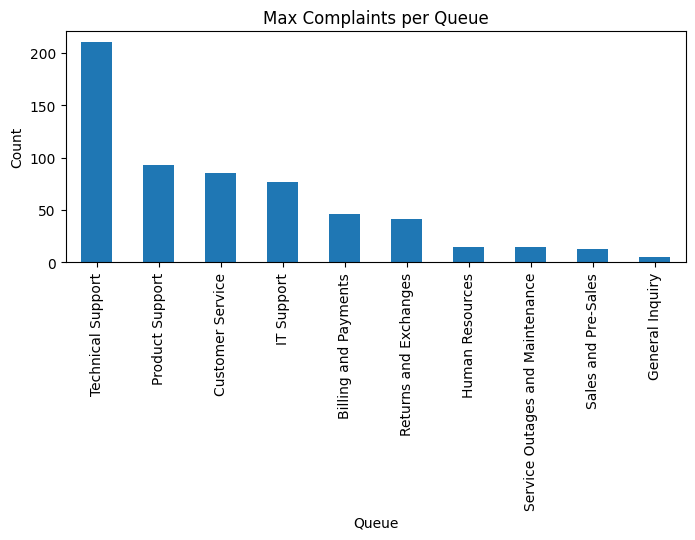

In [ ]:
#visualize number of complaints for each queue

channel_counts = data['queue'].value_counts()
plt.figure(figsize=(8, 3))
channel_counts.plot(kind='bar')
plt.title('Max Complaints per Queue')
plt.xlabel('Queue')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Data Cleaning**

In [ ]:
data.drop(['tag_5','tag_6','tag_7','tag_8','tag_9'], axis=1, inplace=True) # drop columns with maximum null values

In [ ]:
data['subject'].fillna('No subject', inplace=True) # fill null records

<ipython-input-16-9b43efa350f7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['subject'].fillna('No subject', inplace=True) # fill null records


In [ ]:
data.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4
0,36,Anfrage zu den Spezifikationen und Anpassungso...,Sehr geehrtes Support-Team des Tech Online Sto...,"Sehr geehrter <name>,\n\nvielen Dank für Ihr I...",Request,Customer Service,medium,de,Tech Online Store,Product Support,Sales Inquiry,Technical Guidance,General Inquiry
1,39,Déconnexions fréquentes et plantages,Le client signale des déconnexions fréquentes ...,Nous allons enquêter sur le problème avec Zoom...,Incident,Product Support,high,fr,Software Development Company,Technical Support,Software Bug,Service Disruption,System Crash
2,243,Problema de sonido Dell XPS,"Problema con el sonido, manejando como devoluc...",Gracias por su correo electrónico. Procesaremo...,Problem,Returns and Exchanges,medium,es,Tech Online Store,Returns and Exchanges,Product Support,Customer Service,Refund Request
3,381,Assistance requise pour la configuration du ta...,"Cher support client,\n\nNotre client, <name>, ...","Cher <name>,\n\nMerci de nous avoir contactés....",Request,Product Support,medium,fr,Software Development Company,Technical Support,Product Support,General Inquiry,Problem Resolution
4,663,Urgente: Assistência Imediata Necessária para ...,Caro Suporte ao Cliente da Firma de Consultori...,"Caro Cliente,\n\nRecebemos sua solicitação urg...",Incident,Human Resources,medium,pt,IT Consulting Firm,Urgent Issue,Payroll Issue,Technical Support,Service Disruption


**Data Preprocessing**

In [ ]:
# import necessary libraries

!pip install googletrans==3.1.0a0
from googletrans import Translator
translator=Translator()

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=0a15002354831e0ae5cbe0a3beece3f991e79f1b34e7d10e5353cb11fa0f4a98
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succe

In [ ]:
# translating different language inputs to english

translator.raise_Exception = True
def translate_text(text, target_lang='en'): # Check if the text is none or not a string

    if text is None:
        print("Input text is None.")
        return "" # Return an empty string for none input

    if not isinstance(text, str):
        print("Input is not a valid string.")
        return "" # Return empty string for non-string input

    # Check if the string is empty
    if text.strip() == "":
        print("Input text is empty.")
        return ""  # Return empty string for empty input

    try:
        # Attempt to translate the text
        translated = translator.translate(text, dest=target_lang)
        return translated.text
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

In [ ]:
# translate necessary columns

data['eng_subject'] = data.apply(lambda row: translate_text(row['subject'], target_lang='en') if row['language'] != 'en' else row['body'], axis=1)
data['eng_body'] = data.apply(lambda row: translate_text(row['body'], target_lang='en') if row['language'] != 'en' else row['body'], axis=1)

In [ ]:
data['combined_text'] = data['eng_subject'] + " " + data['eng_body'] # combining the translated data

In [ ]:
data.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,eng_subject,eng_body,combined_text
0,36,Anfrage zu den Spezifikationen und Anpassungso...,Sehr geehrtes Support-Team des Tech Online Sto...,"Sehr geehrter <name>,\n\nvielen Dank für Ihr I...",Request,Customer Service,medium,de,Tech Online Store,Product Support,Sales Inquiry,Technical Guidance,General Inquiry,Inquiry about MacBook Air M1 specifications an...,"Dear Tech Online Store Support Team,\n\nI am i...",Inquiry about MacBook Air M1 specifications an...
1,39,Déconnexions fréquentes et plantages,Le client signale des déconnexions fréquentes ...,Nous allons enquêter sur le problème avec Zoom...,Incident,Product Support,high,fr,Software Development Company,Technical Support,Software Bug,Service Disruption,System Crash,Frequent disconnections and crashes,Customer reports frequent disconnections and c...,Frequent disconnections and crashes Customer r...
2,243,Problema de sonido Dell XPS,"Problema con el sonido, manejando como devoluc...",Gracias por su correo electrónico. Procesaremo...,Problem,Returns and Exchanges,medium,es,Tech Online Store,Returns and Exchanges,Product Support,Customer Service,Refund Request,Dell XPS sound problem,"Problem with sound, handling as a return. With...","Dell XPS sound problem Problem with sound, han..."
3,381,Assistance requise pour la configuration du ta...,"Cher support client,\n\nNotre client, <name>, ...","Cher <name>,\n\nMerci de nous avoir contactés....",Request,Product Support,medium,fr,Software Development Company,Technical Support,Product Support,General Inquiry,Problem Resolution,Assistance required for Scrum board setup,"Dear customer support,\n\nOur client, <name>, ...",Assistance required for Scrum board setup Dear...
4,663,Urgente: Assistência Imediata Necessária para ...,Caro Suporte ao Cliente da Firma de Consultori...,"Caro Cliente,\n\nRecebemos sua solicitação urg...",Incident,Human Resources,medium,pt,IT Consulting Firm,Urgent Issue,Payroll Issue,Technical Support,Service Disruption,Urgent: Immediate Assistance Needed for Failed...,"Dear IT Consulting Firm Customer Support, Our ...",Urgent: Immediate Assistance Needed for Failed...


In [ ]:
data.drop(['answer','subject','body','language'], axis=1, inplace=True) # drop unnecessary columns

In [ ]:
data.head()

,id,type,queue,priority,business_type,tag_1,tag_2,tag_3,tag_4,eng_subject,eng_body,combined_text
0,36,Request,Customer Service,medium,Tech Online Store,Product Support,Sales Inquiry,Technical Guidance,General Inquiry,Inquiry about MacBook Air M1 specifications an...,"Dear Tech Online Store Support Team,\n\nI am i...",Inquiry about MacBook Air M1 specifications an...
1,39,Incident,Product Support,high,Software Development Company,Technical Support,Software Bug,Service Disruption,System Crash,Frequent disconnections and crashes,Customer reports frequent disconnections and c...,Frequent disconnections and crashes Customer r...
2,243,Problem,Returns and Exchanges,medium,Tech Online Store,Returns and Exchanges,Product Support,Customer Service,Refund Request,Dell XPS sound problem,"Problem with sound, handling as a return. With...","Dell XPS sound problem Problem with sound, han..."
3,381,Request,Product Support,medium,Software Development Company,Technical Support,Product Support,General Inquiry,Problem Resolution,Assistance required for Scrum board setup,"Dear customer support,\n\nOur client, <name>, ...",Assistance required for Scrum board setup Dear...
4,663,Incident,Human Resources,medium,IT Consulting Firm,Urgent Issue,Payroll Issue,Technical Support,Service Disruption,Urgent: Immediate Assistance Needed for Failed...,"Dear IT Consulting Firm Customer Support, Our ...",Urgent: Immediate Assistance Needed for Failed...


**Text Processing**

In [ ]:
# importing necessary libraries

import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Initialize the NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text (tokenization, stopwords removal, lowercase conversion, lemmatization)
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Convert text to lowercase and tokenize

    # Remove stopwords and punctuation
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]

    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return " ".join(lemmatized_tokens)

In [ ]:
# applying text preprocessing to necessary column

data['preprocessed_text'] = data['combined_text'].apply(preprocess_text)

In [ ]:
data.head()

,id,type,queue,priority,business_type,tag_1,tag_2,tag_3,tag_4,eng_subject,eng_body,combined_text,preprocessed_text
0,36,Request,Customer Service,medium,Tech Online Store,Product Support,Sales Inquiry,Technical Guidance,General Inquiry,Inquiry about MacBook Air M1 specifications an...,"Dear Tech Online Store Support Team,\n\nI am i...",Inquiry about MacBook Air M1 specifications an...,inquiry macbook air m1 specification customiza...
1,39,Incident,Product Support,high,Software Development Company,Technical Support,Software Bug,Service Disruption,System Crash,Frequent disconnections and crashes,Customer reports frequent disconnections and c...,Frequent disconnections and crashes Customer r...,frequent disconnection crash customer report f...
2,243,Problem,Returns and Exchanges,medium,Tech Online Store,Returns and Exchanges,Product Support,Customer Service,Refund Request,Dell XPS sound problem,"Problem with sound, handling as a return. With...","Dell XPS sound problem Problem with sound, han...",dell xps sound problem problem sound handling ...
3,381,Request,Product Support,medium,Software Development Company,Technical Support,Product Support,General Inquiry,Problem Resolution,Assistance required for Scrum board setup,"Dear customer support,\n\nOur client, <name>, ...",Assistance required for Scrum board setup Dear...,assistance required scrum board setup dear cus...
4,663,Incident,Human Resources,medium,IT Consulting Firm,Urgent Issue,Payroll Issue,Technical Support,Service Disruption,Urgent: Immediate Assistance Needed for Failed...,"Dear IT Consulting Firm Customer Support, Our ...",Urgent: Immediate Assistance Needed for Failed...,urgent immediate assistance needed failed payr...


**Model Building**

In [ ]:
# importing necessary libraries

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# vectorizing text

X = vectorizer.fit_transform(data['preprocessed_text'])
vectorizer.get_feature_names_out()
print(X.shape)

(600, 1055)


In [ ]:
A = cv.fit_transform(data['preprocessed_text'])
A = A.toarray()

In [ ]:
A = minmax.fit_transform(A)
A

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.5, ..., 0. , 0. , 0.5],
       [0. , 0. , 0. , ..., 0.5, 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [ ]:
B = le.fit_transform(data['queue'])
B

array([1, 5, 6, 5, 3, 5, 6, 5, 0, 9, 5, 9, 5, 9, 4, 3, 9, 1, 9, 9, 9, 9,
       9, 3, 4, 9, 6, 1, 1, 9, 5, 5, 9, 5, 4, 5, 5, 5, 5, 0, 9, 7, 5, 9,
       5, 0, 6, 9, 9, 9, 2, 3, 1, 4, 9, 5, 4, 1, 9, 1, 9, 9, 9, 4, 9, 9,
       1, 6, 9, 9, 4, 4, 9, 9, 5, 7, 9, 9, 9, 9, 9, 1, 7, 5, 9, 4, 3, 3,
       4, 6, 4, 9, 9, 7, 5, 3, 9, 9, 8, 0, 9, 4, 3, 9, 1, 5, 4, 9, 9, 9,
       9, 9, 1, 9, 7, 9, 4, 0, 9, 4, 4, 5, 9, 5, 4, 9, 9, 9, 9, 1, 5, 0,
       3, 9, 9, 9, 5, 5, 1, 2, 8, 9, 7, 9, 1, 6, 0, 9, 9, 9, 5, 4, 0, 9,
       5, 9, 9, 9, 1, 5, 1, 8, 5, 8, 1, 9, 4, 5, 0, 9, 9, 9, 9, 9, 1, 9,
       6, 0, 9, 9, 9, 9, 9, 9, 1, 1, 1, 9, 9, 0, 3, 5, 5, 3, 4, 4, 1, 9,
       9, 9, 9, 9, 6, 1, 9, 8, 0, 5, 5, 1, 6, 9, 8, 9, 4, 5, 0, 9, 5, 9,
       8, 9, 9, 4, 4, 5, 4, 1, 4, 0, 4, 9, 9, 4, 4, 3, 4, 6, 8, 1, 5, 5,
       1, 6, 1, 0, 4, 9, 5, 4, 6, 1, 9, 7, 0, 1, 6, 4, 0, 4, 1, 9, 1, 6,
       5, 4, 1, 1, 9, 1, 5, 4, 1, 9, 9, 4, 9, 1, 5, 0, 9, 0, 6, 9, 5, 9,
       1, 2, 1, 9, 1, 9, 1, 7, 6, 4, 0, 9, 1, 0, 9,

In [ ]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(420, 1055) (180, 1055) (420,) (180,)


In [ ]:
# Gaussian Naive Bayes

gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred= gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.75      0.83        16
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         5
           4       0.96      1.00      0.98        27
           5       0.66      0.86      0.75        22
           6       0.92      0.92      0.92        13
           7       1.00      1.00      1.00         4
           8       1.00      0.40      0.57         5
           9       0.89      0.86      0.88        74

    accuracy                           0.88       180
   macro avg       0.94      0.88      0.89       180
weighted avg       0.89      0.88      0.88       180



In [ ]:
# Multinomial Naive Bayes

mnb= MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.75      0.83        16
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         5
           4       0.96      1.00      0.98        27
           5       0.66      0.86      0.75        22
           6       0.92      0.92      0.92        13
           7       1.00      1.00      1.00         4
           8       1.00      0.40      0.57         5
           9       0.89      0.86      0.88        74

    accuracy                           0.88       180
   macro avg       0.94      0.88      0.89       180
weighted avg       0.89      0.88      0.88       180



In [ ]:
# Bernaulli Naive Bayes

bnb=BernoulliNB()
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.75      0.83        16
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         5
           4       0.96      1.00      0.98        27
           5       0.66      0.86      0.75        22
           6       0.92      0.92      0.92        13
           7       1.00      1.00      1.00         4
           8       1.00      0.40      0.57         5
           9       0.89      0.86      0.88        74

    accuracy                           0.88       180
   macro avg       0.94      0.88      0.89       180
weighted avg       0.89      0.88      0.88       180



In [ ]:
# Logistic Regression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.94      0.91        16
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         5
           4       0.95      0.78      0.86        27
           5       0.86      0.82      0.84        22
           6       1.00      0.85      0.92        13
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         5
           9       0.89      0.97      0.93        74

    accuracy                           0.92       180
   macro avg       0.96      0.94      0.94       180
weighted avg       0.92      0.92      0.92       180



In [ ]:
# Random forest

rf_clf = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy1:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report1:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy1: 0.8888888888888888
Random Forest Classification Report1:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         5
           4       1.00      0.74      0.85        27
           5       1.00      0.73      0.84        22
           6       1.00      0.85      0.92        13
           7       1.00      1.00      1.00         4
           8       1.00      0.40      0.57         5
           9       0.79      1.00      0.88        74

    accuracy                           0.89       180
   macro avg       0.98      0.86      0.90       180
weighted avg       0.91      0.89      0.89       180



In [ ]:
# Sample new ticket data for inference
new_tickets = [" Screen goes black intermittently. Need troubleshooting for hardware or software cause."]

# Preprocess the new data in the same way as before
new_tickets_preprocessed = [preprocess_text(ticket) for ticket in new_tickets]

# Transform the preprocessed data using the same vectorizer (CountVectorizer)
new_tickets_vectorized = cv.transform(new_tickets_preprocessed)
new_tickets_vectorized = new_tickets_vectorized.toarray()

# Scale the data if necessary (using MinMaxScaler if it was used before)
new_tickets_scaled = minmax.transform(new_tickets_vectorized)

# Perform inference using the trained model (e.g., Random Forest)
predictions = rf_clf.predict(new_tickets_scaled)

# Map predictions back to class names if needed
predicted_classes = le.inverse_transform(predictions)

# Output the results
for ticket, prediction in zip(new_tickets, predicted_classes):
    print(f"Ticket: '{ticket}' => Predicted Class: {prediction}")

Ticket: ' Screen goes black intermittently. Need troubleshooting for hardware or software cause.' => Predicted Class: Product Support


In [ ]:
import joblib

joblib.dump(clf, 'clf.pkl')
joblib.dump(le, 'le.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(cv, 'cv.pkl')
joblib.dump(minmax, 'minmax.pkl')

['minmax.pkl']